In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
train_dataset = torchvision.datasets.MNIST(root='data', download=False, train=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='data', download=False, train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=1)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=1)

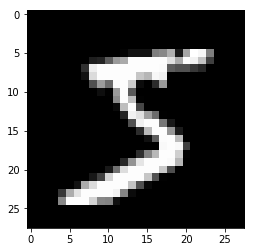

In [3]:
plt.imshow(train_dataset[0][0][0], cmap='gray')

In [4]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 1000),
            nn.ReLU(True),
            nn.Linear(1000, 784),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        out = self.encoder(input)
        out = self.decoder(out)
        return out
    
    def encode(self, input):
        out = self.encoder(input)
        return out
    
    def decode(self, input):
        out = self.decoder(input)
        return out

In [5]:
autoencoder = AutoEncoder()
device = torch.device("cuda:0")
autoencoder = autoencoder.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001, betas=(0.9, 0.999))

Epoch 1, Loss: 0.05126590290480954


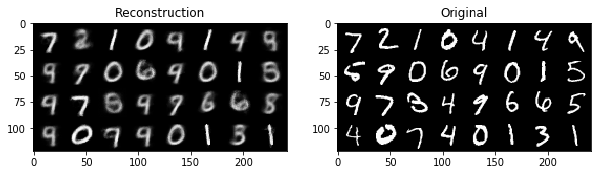

Epoch 2, Loss: 0.04131334412715629


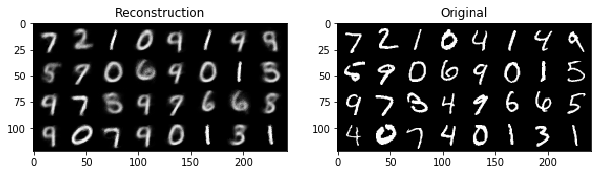

Epoch 3, Loss: 0.0394298887023559


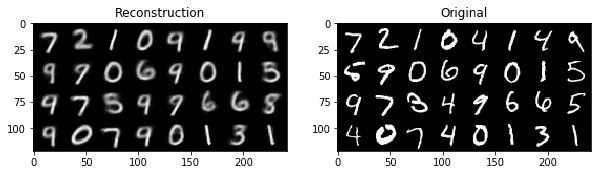

Epoch 4, Loss: 0.03828955920906658


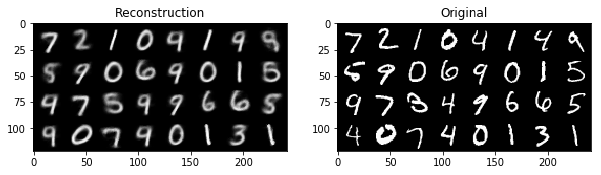

Epoch 5, Loss: 0.03744564950466156


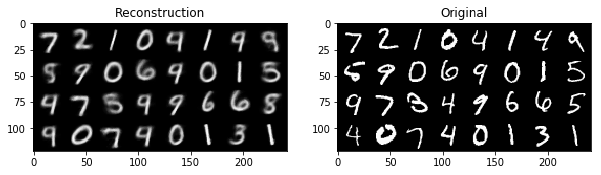

Epoch 6, Loss: 0.03681127700763635


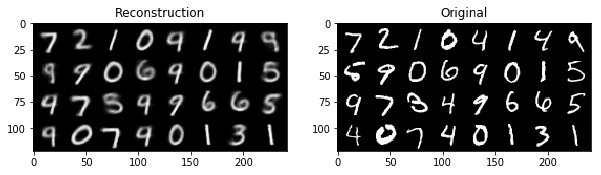

Epoch 7, Loss: 0.036414705702445954


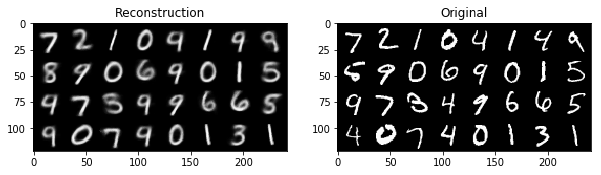

Epoch 8, Loss: 0.03610066641281303


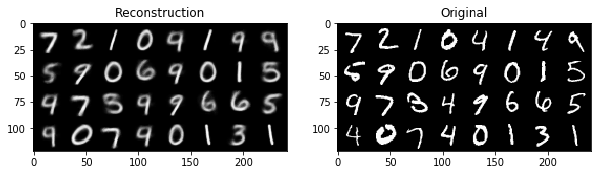

Epoch 9, Loss: 0.035672485151797786


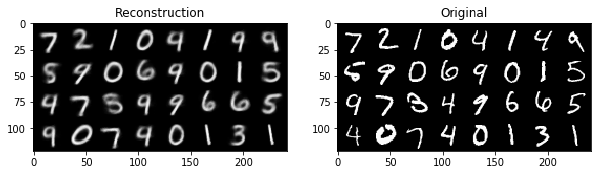

Epoch 10, Loss: 0.03549212839008651


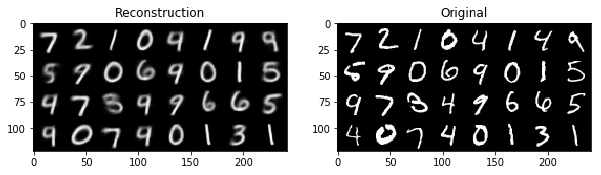

In [6]:
model = autoencoder
for epoch in range(1, 10+1):
    total_loss = 0
    for batch_num, (input, labels) in enumerate(train_loader):
        input = input.to(device)
        input = input.view(-1, 784)
        output = model(input)
        loss = criterion(output, input)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("Epoch {}, Loss: {}".format(epoch , total_loss/batch_num))
    
    # Show recovery
    input, _ = next(iter(test_loader))
    input = input.view(-1, 784).to(device)
    output = model(input)
    reconstructed = torchvision.utils.make_grid(output.view(-1, 1, 28, 28))
    reconstructed = reconstructed.data.cpu().numpy()
    reconstructed = reconstructed.transpose((1, 2, 0))
    reconstructed = np.clip(reconstructed, 0, 1)
    fig = plt.figure(figsize=(10, 8))
    plt.subplot(121)
    plt.imshow(reconstructed)
    plt.title('Reconstruction')
    origin = torchvision.utils.make_grid(input.view(-1, 1, 28, 28))
    origin = origin.data.cpu().numpy()
    origin = origin.transpose((1, 2, 0))
    origin = np.clip(origin, 0, 1)
    plt.subplot(122)
    plt.imshow(origin)
    plt.title('Original')
    plt.show()

# Decode from random 2 features

tensor([0.0957, 0.4093])


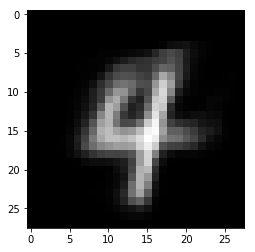

In [16]:
to_decode = torch.rand(2)
print(to_decode)
to_decode = to_decode.to(device)
output = autoencoder.decode(to_decode)
output = output.view(28, 28)
output = output.cpu().data.numpy()
plt.imshow(output, cmap='gray')
plt.show()